# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

In [205]:
# All required libraries are imported here for you.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Write your code here

In [206]:
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [207]:
crops.info()
crops.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


In [208]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 

In [209]:
le = LabelEncoder()
crop_encoded = crops.copy()

In [210]:
crop_encoded["crop_encoded"] = le.fit_transform(crop_encoded["crop"])

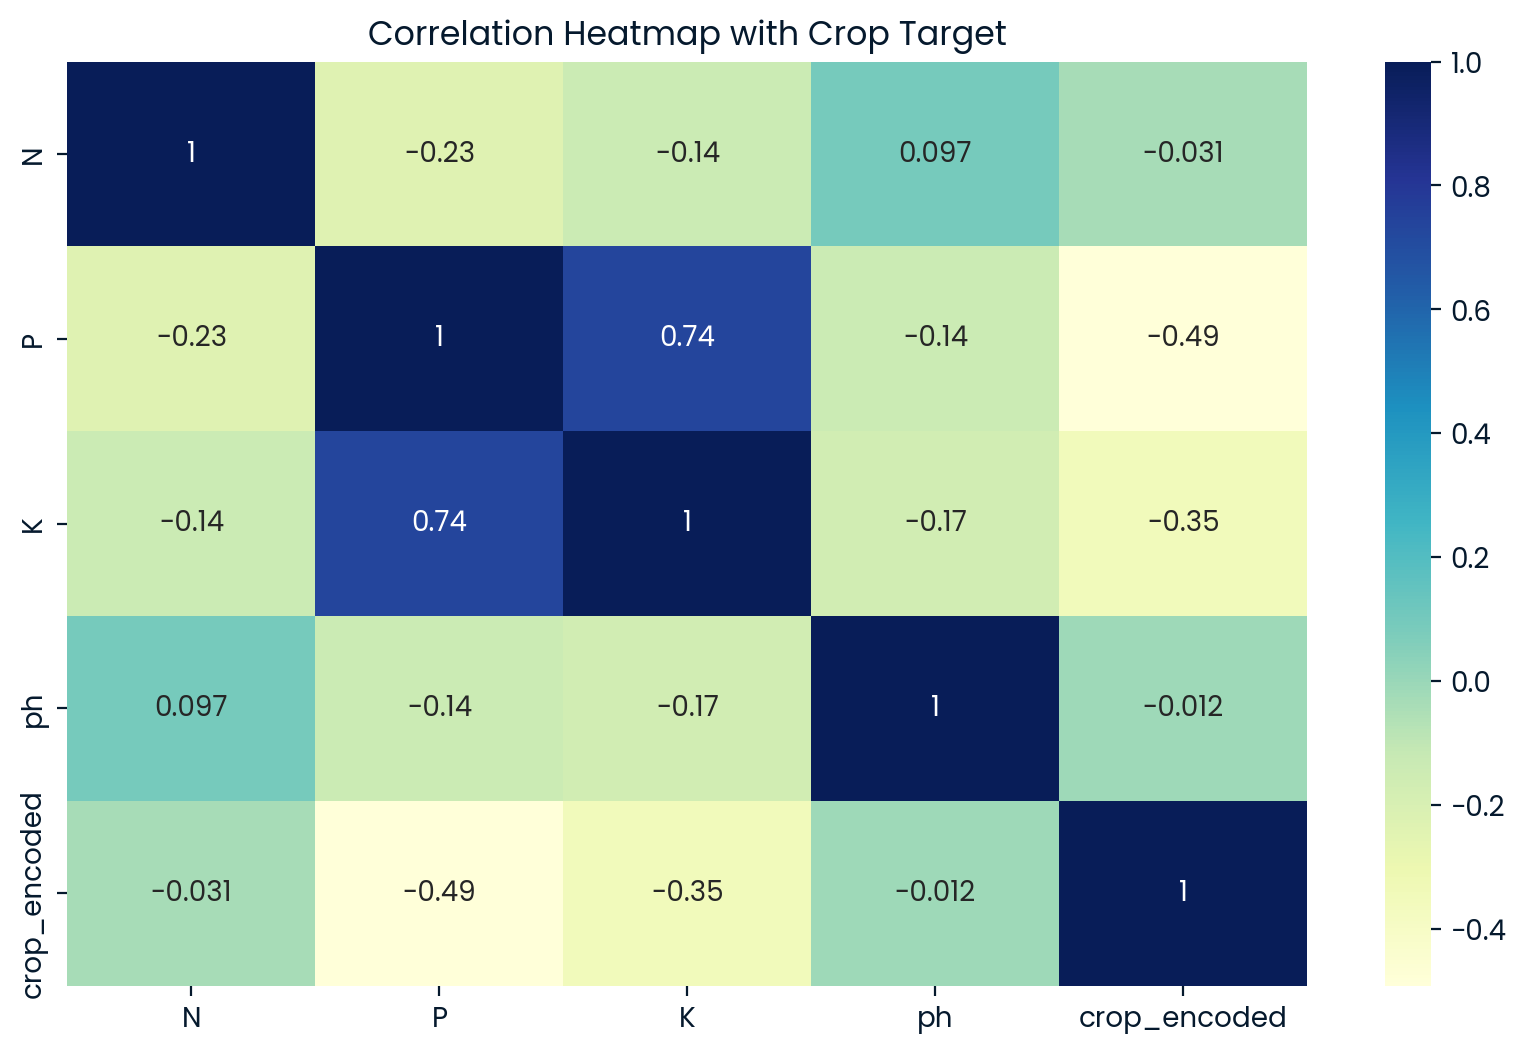

In [211]:
corr_matrix = crop_encoded.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap with Crop Target")
plt.show()

May be K or P

In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 

logreg = LogisticRegression()
DTree = DecisionTreeClassifier(random_state=42)
RForest = RandomForestClassifier(random_state=42)

In [213]:
models = {"Logisitic_Regression":logreg, "Decision_Tree":DTree, "Random_Forest":RForest}
features = {"N":"N","P":"P","K":"K","pH":"ph"}


In [214]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [216]:
best_score = 0
best_model = None
best_feature = None
best_f1 = None

Z = crop_encoded.drop(["crop","crop_encoded"],axis =1)
y= crop_encoded["crop_encoded"]

for model in models.values():
    for feature in features.values() :
        X = Z[[feature]]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model.fit(X_train,y_train)
        ypred = model.predict(X_test)
        print(f'''
    ======================================================
    This model is {model}
    Its accuracy score is :{accuracy_score(ypred,y_test)}
    Its F1 score is : {f1_score(y_test, y_pred, average="weighted")}]
    This feature is : {feature}
    =======================================================''')
        
        if accuracy_score(ypred,y_test) > best_score :
            best_score = accuracy_score(ypred,y_test)
            best_model = next((k for k, v in models.items() if v == model), None)
            best_feature = key = next((k for k, v in features.items() if v == feature), None)
            best_f1 = f1_score(y_test, y_pred, average="weighted")

        

    



    This model is LogisticRegression()
    Its accuracy score is :0.13863636363636364
    Its F1 score is : 0.13933118415602647]
    This feature is : N

    This model is LogisticRegression()
    Its accuracy score is :0.20227272727272727
    Its F1 score is : 0.13933118415602647]
    This feature is : P

    This model is LogisticRegression()
    Its accuracy score is :0.2863636363636364
    Its F1 score is : 0.13933118415602647]
    This feature is : K

    This model is LogisticRegression()
    Its accuracy score is :0.09772727272727273
    Its F1 score is : 0.13933118415602647]
    This feature is : ph

    This model is DecisionTreeClassifier(random_state=42)
    Its accuracy score is :0.14545454545454545
    Its F1 score is : 0.13933118415602647]
    This feature is : N

    This model is DecisionTreeClassifier(random_state=42)
    Its accuracy score is :0.20681818181818182
    Its F1 score is : 0.13933118415602647]
    This feature is : P

    This model is DecisionTreeClassif

In [218]:

best_predictive_feature = {best_feature: best_f1}

print(best_predictive_feature)    


{'K': 0.13933118415602647}
